Optimize the portfolio.
=====



In [1]:
from mypo import Runner, Loader
from mypo.rebalancer import MonthlyRebalancer
from mypo.optimizer import NoOptimizer, MinimumVarianceOptimizer, SharpeRatioOptimizer, MaximumDiversificationOptimizer, RiskParityOptimizer
import matplotlib.pyplot as plt

In [2]:
loader = Loader()
loader.get('VOO', 0.0003)
loader.get('EDV', 0.0007)
market = loader.get_market()

100%|██████████| 2557/2557 [00:25<00:00, 98.36it/s]


      tickers  yearly total return  sharpe ratio  max draw down  \
0  [VOO, EDV]             1.122167      0.721441       0.711339   

   max draw down span  
0                 229  
              return       std  sharpe ratio  draw down
2011-12-31  0.004281  0.232639     -0.067568   0.849871
2012-12-31  0.130682  0.103948      1.064780   0.922067
2013-12-31  0.219247  0.090754      2.195472   0.950295
2014-12-31  0.111791  0.092767      0.989482   0.938500
2015-12-31 -0.004456  0.128868     -0.189776   0.899746
2016-12-31  0.114280  0.107353      0.878225   0.890167
2017-12-31  0.174764  0.056116      2.757924   0.977677
2018-12-31 -0.045491  0.141795     -0.461866   0.834678
2019-12-31  0.258997  0.103284      2.313967   0.864255
2020-12-31  0.126400  0.280770      0.378958   0.711339
2021-12-31  0.186071  0.108099      1.536287   0.965026


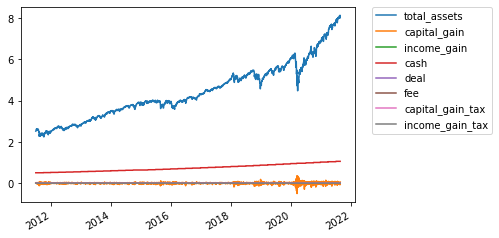

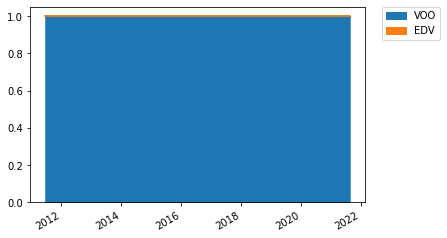

In [3]:
optimizer = NoOptimizer(weights=[1, 0])
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer)
)

runner.run(
    assets=[2.0, 0.0],
    cash=0.5,
    market=market,
    train_span=200,
    verbose=True
)
report = runner.report()
print(report.summary())
print(report.annual_summary())
ax = report.history().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

100%|██████████| 2557/2557 [00:28<00:00, 90.02it/s]


      tickers  yearly total return  sharpe ratio  max draw down  \
0  [VOO, EDV]              1.09361       0.91739       0.858171   

   max draw down span  
0                 267  
              return       std  sharpe ratio  draw down
2011-12-31  0.119474  0.106308      0.935716   0.944688
2012-12-31  0.093541  0.056119      1.310445   0.975900
2013-12-31  0.076363  0.070766      0.796479   0.936778
2014-12-31  0.183538  0.056310      2.904265   0.973047
2015-12-31 -0.020865  0.084095     -0.485935   0.918111
2016-12-31  0.061899  0.073751      0.568117   0.927127
2017-12-31  0.140918  0.042325      2.856932   0.949114
2018-12-31 -0.009143  0.079969     -0.364434   0.928295
2019-12-31  0.199236  0.065628      2.731094   0.954914
2020-12-31  0.090131  0.136301      0.514529   0.858171
2021-12-31  0.034581  0.085731      0.170081   0.904548


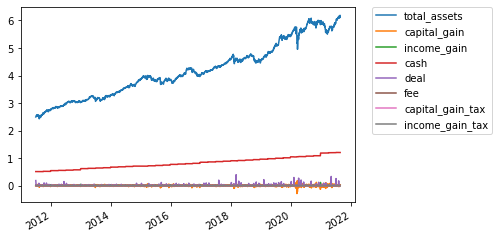

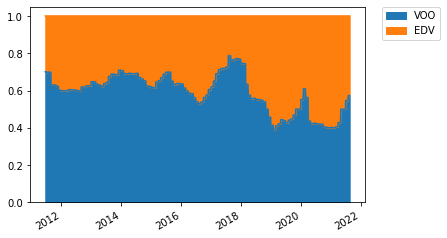

In [4]:
optimizer = MinimumVarianceOptimizer(do_re_optimize=True)
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer)
)

runner.run(
    assets=[1.2, 0.8],
    cash=0.5,
    market=market,
    train_span=200,
    verbose=True
)
report = runner.report()
print(report.summary())
print(report.annual_summary())
ax = report.history().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

100%|██████████| 2557/2557 [00:28<00:00, 90.02it/s]


      tickers  yearly total return  sharpe ratio  max draw down  \
0  [VOO, EDV]             1.087929      0.831618       0.860487   

   max draw down span  
0                 303  
              return       std  sharpe ratio  draw down
2011-12-31  0.101935  0.109344      0.749331   0.934334
2012-12-31  0.096459  0.056511      1.353001   0.973694
2013-12-31  0.099814  0.070021      1.139858   0.938941
2014-12-31  0.174823  0.058746      2.635467   0.972519
2015-12-31 -0.024099  0.085342     -0.516729   0.913604
2016-12-31  0.054996  0.075220      0.465251   0.923940
2017-12-31  0.145810  0.043428      2.896978   0.945268
2018-12-31 -0.002676  0.080995     -0.279969   0.925272
2019-12-31  0.194977  0.072129      2.425907   0.955537
2020-12-31  0.058338  0.135502      0.282933   0.860487
2021-12-31  0.012397  0.089967     -0.084505   0.871236


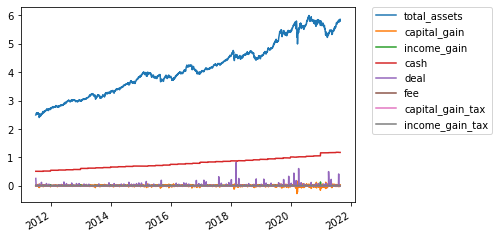

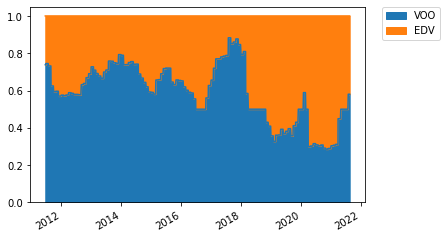

In [5]:
optimizer = MinimumVarianceOptimizer(with_semi_covariance=True, do_re_optimize=True)
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer)

)

runner.run(
    assets=[1.2, 0.8],
    cash=0.5,
    market=market,
    train_span=200,
    verbose=True
)
report = runner.report()
print(report.summary())
print(report.annual_summary())
ax = report.history().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

100%|██████████| 2557/2557 [00:28<00:00, 89.49it/s]


      tickers  yearly total return  sharpe ratio  max draw down  \
0  [VOO, EDV]             1.076261      0.543769       0.834547   

   max draw down span  
0                 356  
              return       std  sharpe ratio  draw down
2011-12-31 -0.011870  0.174851     -0.182269   0.862750
2012-12-31  0.079848  0.059955      0.998218   0.938292
2013-12-31  0.157443  0.076727      1.791321   0.942330
2014-12-31  0.152063  0.074682      1.768329   0.954497
2015-12-31 -0.085150  0.106522     -0.987119   0.878547
2016-12-31  0.087099  0.110932      0.604870   0.876337
2017-12-31  0.168898  0.055917      2.662851   0.931631
2018-12-31 -0.065389  0.132801     -0.642984   0.834547
2019-12-31  0.227804  0.091586      2.268946   0.864147
2020-12-31  0.047596  0.139036      0.198478   0.857005
2021-12-31  0.060129  0.095735      0.419163   0.904145


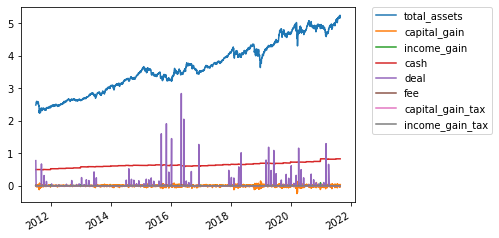

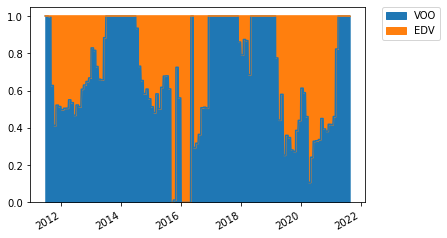

In [6]:
optimizer = SharpeRatioOptimizer(do_re_optimize=True)
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer)
)

runner.run(
    assets=[1.2, 0.8],
    cash=0.5,
    market=market,
    train_span=200,
    verbose=True
)
report = runner.report()
print(report.summary())
print(report.annual_summary())
ax = report.history().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

100%|██████████| 2557/2557 [00:29<00:00, 88.15it/s]


      tickers  yearly total return  sharpe ratio  max draw down  \
0  [VOO, EDV]             1.097104      0.973233       0.860672   

   max draw down span  
0                 259  
              return       std  sharpe ratio  draw down
2011-12-31  0.140836  0.101429      1.191333   0.959363
2012-12-31  0.091821  0.057257      1.254353   0.975547
2013-12-31  0.063153  0.072105      0.598476   0.934230
2014-12-31  0.197220  0.055625      3.185969   0.974626
2015-12-31 -0.020343  0.083618     -0.482469   0.921480
2016-12-31  0.061061  0.074068      0.554360   0.921090
2017-12-31  0.135903  0.044091      2.628754   0.943999
2018-12-31 -0.013885  0.076654     -0.442053   0.930290
2019-12-31  0.200613  0.064145      2.815719   0.952952
2020-12-31  0.108962  0.133637      0.665701   0.860672
2021-12-31  0.041933  0.084919      0.258278   0.912403


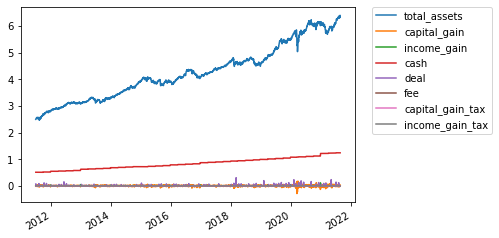

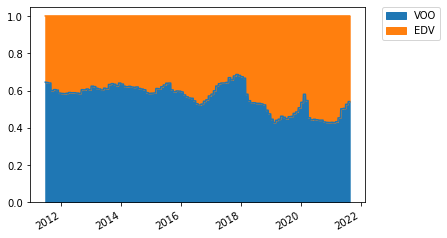

In [7]:
optimizer = MaximumDiversificationOptimizer(do_re_optimize=True)
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer)
)

runner.run(
    assets=[1.2, 0.8],
    cash=0.5,
    market=market,
    train_span=200,
    verbose=True
)
report = runner.report()
print(report.summary())
print(report.annual_summary())
ax = report.history().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


100%|██████████| 2557/2557 [00:28<00:00, 89.54it/s]


      tickers  yearly total return  sharpe ratio  max draw down  \
0  [VOO, EDV]             1.097106      0.973265       0.860674   

   max draw down span  
0                 259  
              return       std  sharpe ratio  draw down
2011-12-31  0.140837  0.101429      1.191344   0.959364
2012-12-31  0.091822  0.057257      1.254383   0.975549
2013-12-31  0.063155  0.072105      0.598503   0.934233
2014-12-31  0.197208  0.055624      3.185802   0.974626
2015-12-31 -0.020366  0.083620     -0.482732   0.921462
2016-12-31  0.061065  0.074068      0.554425   0.921093
2017-12-31  0.135912  0.044089      2.629078   0.944002
2018-12-31 -0.013875  0.076653     -0.441921   0.930308
2019-12-31  0.200604  0.064144      2.815611   0.952967
2020-12-31  0.108996  0.133633      0.665972   0.860674
2021-12-31  0.041933  0.084918      0.258282   0.912406


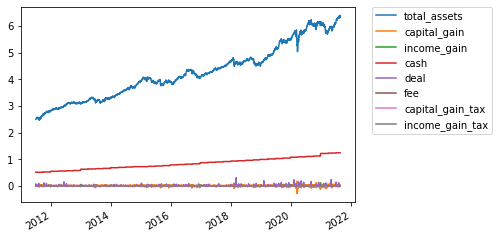

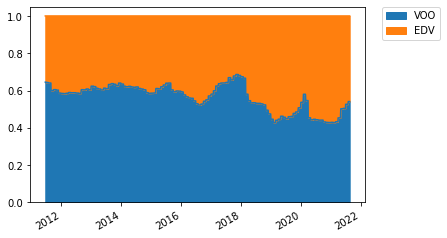

In [8]:
optimizer = RiskParityOptimizer(do_re_optimize=True)
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer)
)

runner.run(
    assets=[1.2, 0.8],
    cash=0.5,
    market=market,
    train_span=200,
    verbose=True
)
report = runner.report()
print(report.summary())
print(report.annual_summary())
ax = report.history().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()